In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math
import seaborn as sns

In [70]:
winnipegData = pd.read_csv("C:/Users/dunca/OneDrive/Desktop/School/4th_Year/351/CMPE351/data/Winnipeg/listings.csv")
quebecCityData = pd.read_csv("C:/Users/dunca/OneDrive/Desktop/School/4th_Year/351/CMPE351/data/Quebec_City/listings.csv")
winnipegData['price'].head()

0     $82.00
1     $35.00
2     $63.00
3     $90.00
4    $200.00
Name: price, dtype: object

In [71]:
winnipegData['price'] = winnipegData['price'].str.replace('$', '').str.replace(',', '').astype(float)
quebecCityData['price'] = quebecCityData['price'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\dunca\AppData\Local\Temp/ipykernel_32468/1314439536.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  winnipegData['price'] = winnipegData['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\dunca\AppData\Local\Temp/ipykernel_32468/1314439536.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  quebecCityData['price'] = quebecCityData['price'].str.replace('$', '').str.replace(',', '').astype(float)


# Data Exploration

Number of Unique Winnipeg Hosts:  992
Number of Entries Winnipeg:  1892
Average Entries per Winnipeg Host:  1.907258064516129
Number of Unique Quebec City Hosts:  1091
Number of Entries Quebec City:  2213
Average Entries per Quebec City Host:  2.028414298808433


Text(0, 0.5, 'Frequency')

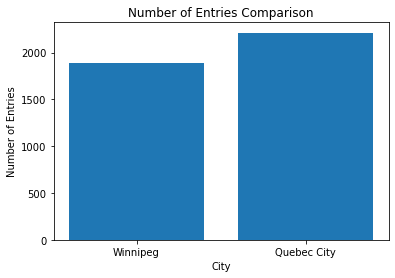

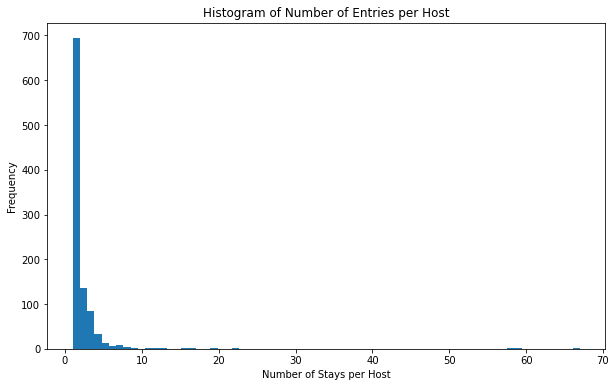

In [72]:
print("Number of Unique Winnipeg Hosts: ", winnipegData['host_id'].nunique())
print("Number of Entries Winnipeg: ", len(winnipegData))
print("Average Entries per Winnipeg Host: ", len(winnipegData)/winnipegData['host_id'].nunique())
print("Number of Unique Quebec City Hosts: ", quebecCityData['host_id'].nunique())
print("Number of Entries Quebec City: ", len(quebecCityData))
print("Average Entries per Quebec City Host: ", len(quebecCityData)/quebecCityData['host_id'].nunique())

plt.bar(['Winnipeg', 'Quebec City'], [len(winnipegData), len(quebecCityData)])
plt.title('Number of Entries Comparison')
plt.xlabel('City')
plt.ylabel('Number of Entries')
# plt.show()

# Histogram of number of stays per host_id
entries_per_host = winnipegData.groupby('host_id').size()

plt.figure(figsize=(10, 6))
plt.hist(entries_per_host, bins=70)
plt.title('Histogram of Number of Entries per Host')
plt.xlabel('Number of Stays per Host')
plt.ylabel('Frequency')
# plt.show()


In [73]:
hostColumns = ['id', 'host_id','host_name','host_since','host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate',
               'host_is_superhost','host_thumbnail_url','host_listings_count','host_total_listings_count','host_verifications',
               'host_has_profile_pic','host_identity_verified','review_scores_communication','license']

# count number of host_verification

filtered_data_winnipeg = winnipegData[hostColumns]
filtered_data_quebec = quebecCityData[hostColumns]

# Map NaN to 0 and non-NaN to 1
mapTFCols = ['host_about', 'host_thumbnail_url', 'license']
for column in mapTFCols:
    filtered_data_winnipeg[column].loc[~filtered_data_winnipeg[column].isnull()] = 1  # not nan
    filtered_data_winnipeg[column].loc[filtered_data_winnipeg[column].isnull()] = 0   # nan
    filtered_data_quebec[column].loc[~filtered_data_quebec[column].isnull()] = 1  # not nan
    filtered_data_quebec[column].loc[filtered_data_quebec[column].isnull()] = 0   # nan

# Map NaN values to 0
mapNullCols = ['host_response_rate', 'host_acceptance_rate', 'host_response_time']
for column in mapNullCols:
    filtered_data_winnipeg[column].loc[filtered_data_winnipeg[column].isnull()] = 0   # nan
    filtered_data_quebec[column].loc[filtered_data_quebec[column].isnull()] = 0   # nan

# numerizerize host_response_time and t/f columns
columns_tf = ['host_has_profile_pic', 'host_identity_verified','host_is_superhost']  # Add more columns as needed
for col in columns_tf:
    filtered_data_winnipeg[col] = filtered_data_winnipeg[col].replace({'t': 1, 'f': 0, '': 0})
    filtered_data_quebec[col] = filtered_data_quebec[col].replace({'t': 1, 'f': 0, '':0})
filtered_data_quebec['host_response_time'] = filtered_data_quebec['host_response_time'].replace({'a few days or more': 1, 'within a day': 2, 'within a few hours':3, 'within an hour':4})
filtered_data_winnipeg['host_verifications'] = filtered_data_winnipeg['host_verifications'].apply(lambda x: len(eval(x)))
filtered_data_winnipeg.head()


C:\Users\dunca\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\dunca\AppData\Local\Temp/ipykernel_32468/18760593.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_winnipeg[col] = filtered_data_winnipeg[col].replace({'t': 1, 'f': 0, '': 0})
C:\Users\dunca\AppData\Local\Temp/ipykernel_32468/18760593.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,id,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,review_scores_communication,license
0,464384,955449,Silvio,2011-08-11,"Winnipeg, Canada",1,within a few hours,1.0,0.69,0.0,1,2,4,2,1,1,4.77,0.0
1,1526583,8145510,Ruth,2013-08-14,Canada,0,within an hour,1.0,0.92,0.0,1,6,6,2,1,1,4.85,0.0
2,1529013,4997811,Rebecca,2013-02-07,"Winnipeg, Canada",1,within an hour,1.0,0.93,1.0,1,4,4,2,1,1,4.98,0.0
3,1559076,970192,Colleen,2011-08-14,"Amsterdam, Netherlands",1,within a day,1.0,0.40,0.0,1,1,1,2,1,1,4.93,0.0
4,1664166,8288997,Richard,2013-08-20,"Winnipeg, Canada",1,within an hour,1.0,1.00,1.0,1,1,1,2,1,1,4.93,0.0


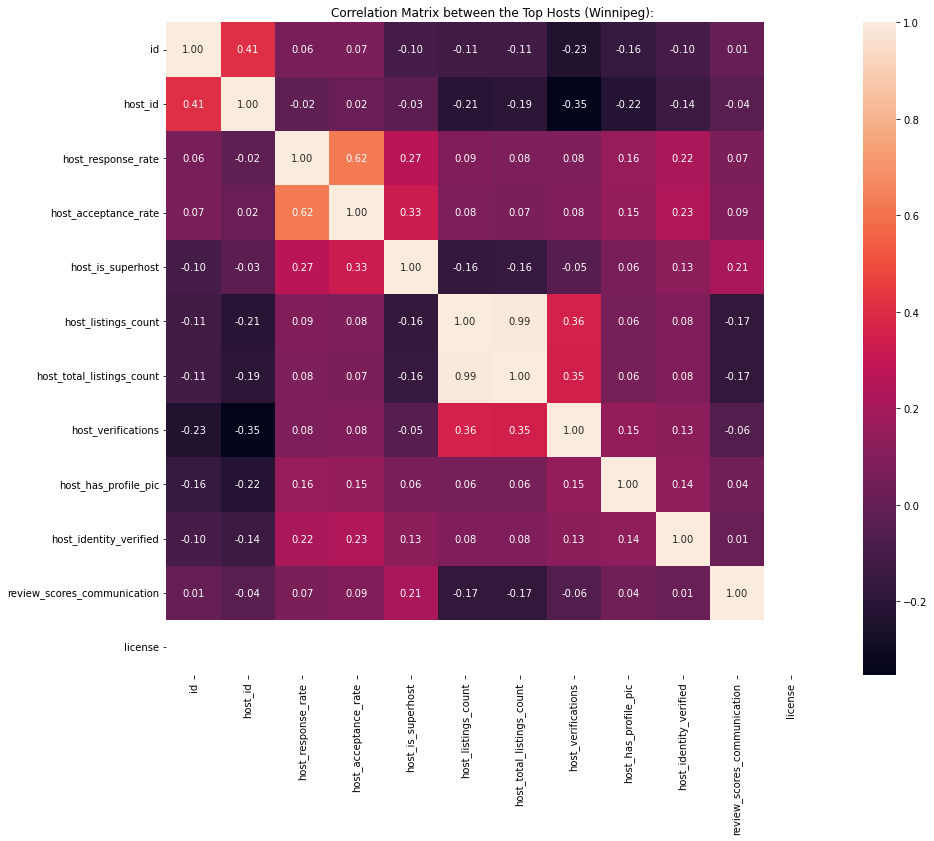

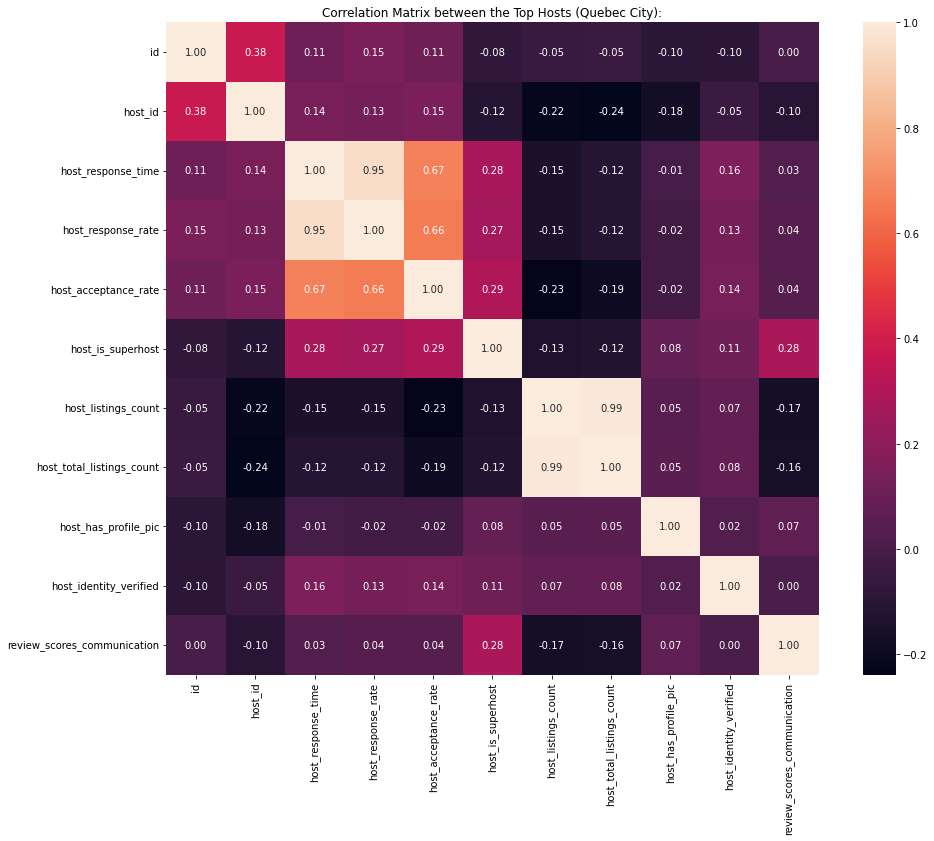

In [74]:
numeric_columns = filtered_data_winnipeg.select_dtypes(include=['int64', 'float64'])
# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix between the Top Hosts (Winnipeg):')
plt.show()

numeric_columns = filtered_data_quebec.select_dtypes(include=['int64', 'float64'])
# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix between the Top Hosts (Quebec City):')
plt.show()


In [75]:
# Convert host_since to datetime if not already
filtered_data_quebec['host_since'] = pd.to_datetime(filtered_data_quebec['host_since'])

total_hosts = len(filtered_data_quebec)
top_10_percent = int(total_hosts * 0.2)

top_hosts = filtered_data_quebec.groupby('host_id').agg({'host_since': 'min'}).sort_values('host_since').head(top_10_percent)

# Calculate the average host start date
average_host_start = top_hosts['host_since'].mean()


top_hosts['host_since_days'] = (top_hosts['host_since'] - pd.to_datetime("1970-01-01")).dt.days
variance_host_since = top_hosts['host_since_days'].var()

standard_deviation_days = np.sqrt(variance_host_since)
print("Standard Deviation of host_since for top 10% of hosts:", standard_deviation_days)


print("Average host start date for top 10% of hosts:", average_host_start)
print("Variance of host_since for top 10% of hosts:", variance_host_since)


Standard Deviation of host_since for top 10% of hosts: 459.6869433490975
Average host start date for top 10% of hosts: 2015-01-12 19:16:33.665158400
Variance of host_since for top 10% of hosts: 211312.08588563636


C:\Users\dunca\AppData\Local\Temp/ipykernel_32468/1991144836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_quebec['host_since'] = pd.to_datetime(filtered_data_quebec['host_since'])


C:\Users\dunca\AppData\Local\Temp/ipykernel_32468/1879705303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_quebec['host_since'] = pd.to_datetime(filtered_data_quebec['host_since'])


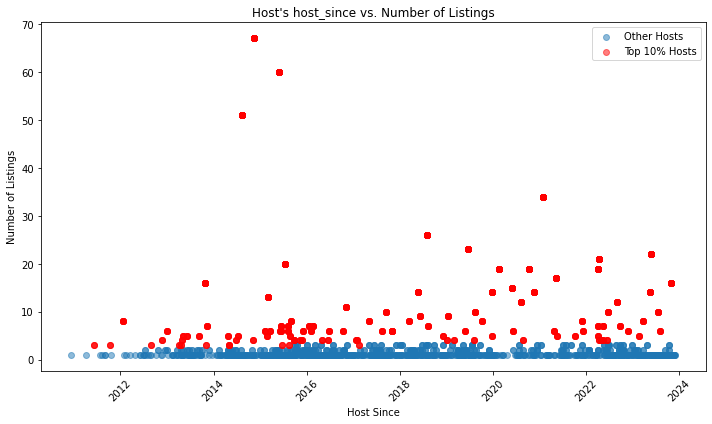

In [76]:
filtered_data_quebec['host_since'] = pd.to_datetime(filtered_data_quebec['host_since'])

# Group by host_id to get the number of listings for each host
hosts_listings_count = filtered_data_quebec.groupby('host_id')['id'].count()

# Merge with original data to get host_since for each host
hosts_data = pd.merge(filtered_data_quebec, hosts_listings_count, on='host_id', suffixes=('', '_count'))

# Calculate the top 10% of hosts based on number of listings
total_hosts = len(hosts_data['host_id'].unique())
top_10_percent = int(total_hosts * 0.10)
top_hosts_ids = hosts_listings_count.nlargest(top_10_percent).index

top_hosts_data = hosts_data[hosts_data['host_id'].isin(top_hosts_ids)]
other_hosts_data = hosts_data[~hosts_data['host_id'].isin(top_hosts_ids)]

plt.figure(figsize=(10, 6))
plt.scatter(other_hosts_data['host_since'], other_hosts_data['id_count'], alpha=0.5, label='Other Hosts')
plt.scatter(top_hosts_data['host_since'], top_hosts_data['id_count'], alpha=0.5, color='red', label='Top 10% Hosts')
plt.title("Host's host_since vs. Number of Listings")
plt.xlabel("Host Since")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


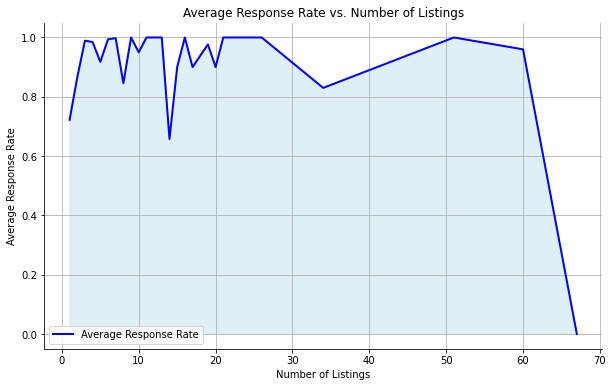

In [77]:
avg_response_by_host = filtered_data_quebec.groupby('host_id')['host_response_rate'].mean()

listings_per_host = filtered_data_quebec['host_id'].value_counts()

host_stats = pd.DataFrame({
    'host_id': avg_response_by_host.index,
    'avg_response_rate': avg_response_by_host.values,
    'listings_count': listings_per_host[avg_response_by_host.index].values
})

# Calculate the mean response rate for each unique number of listings
mean_response_rate_by_listings = host_stats.groupby('listings_count')['avg_response_rate'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_response_rate_by_listings['listings_count'], mean_response_rate_by_listings['avg_response_rate'], color='blue', linewidth=2, label='Average Response Rate')
plt.fill_between(mean_response_rate_by_listings['listings_count'], mean_response_rate_by_listings['avg_response_rate'], color='lightblue', alpha=0.4)
plt.title('Average Response Rate vs. Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [78]:
total_hosts = len(filtered_data_quebec['host_id'].unique())
top_10_percent_hosts = filtered_data_quebec['host_id'].value_counts().nlargest(int(total_hosts * 0.10)).index

top_10_percent_data = filtered_data_quebec[filtered_data_quebec['host_id'].isin(top_10_percent_hosts)]

median_host_start_date = top_10_percent_data['host_since'].mode()[0]

print("Median Host Start Date for Top 10% Hosts:", median_host_start_date)

top_10_percent_data['variance_days'] = (top_10_percent_data['host_since'] - median_host_start_date).dt.days

average_variance_days = top_10_percent_data['variance_days'].abs().mean()

print("Average Variance in Days from Average Start Date:", average_variance_days)


Median Host Start Date for Top 10% Hosts: 2014-11-13 00:00:00
Average Variance in Days from Average Start Date: 1355.2819253438115


C:\Users\dunca\AppData\Local\Temp/ipykernel_32468/818137444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_percent_data['variance_days'] = (top_10_percent_data['host_since'] - median_host_start_date).dt.days


In [79]:
def calculate_superhost_percentage(filtered_data):
    host_id_counts = filtered_data['host_id'].value_counts()
    
    top_5p_entriesFunc = math.floor(filtered_data['host_id'].nunique() * 0.05)
    
    # Retrieve the host IDs of the top hosts
    top_hosts = host_id_counts.head(top_5p_entriesFunc).index.tolist()
    
    # Filter the data to include only the top hosts
    top_hosts_data = filtered_data[filtered_data['host_id'].isin(top_hosts)]
    
    superhosts_count = top_hosts_data['host_is_superhost'].sum()
    
    # Calculate the percentage of superhosts among the top hosts
    superhost_percentage = (superhosts_count / len(top_hosts_data)) * 100
    
    return superhost_percentage

In [80]:
# Count the number of occurrences of each host_id
winnipeg_host_id_counts = filtered_data_winnipeg['host_id'].value_counts()
# # Display the top 5 percent
winnipeg_top_5p_entries = math.floor(filtered_data_winnipeg['host_id'].nunique()*0.05)  
winnipeg_top_5p_entries = winnipeg_host_id_counts.head(winnipeg_top_5p_entries).index.tolist()
filtered_data_winnipeg = filtered_data_winnipeg[filtered_data_winnipeg['host_id'].isin(winnipeg_top_5p_entries)].copy()

# Count the number of occurrences of each host_id
quebec_host_id_counts = filtered_data_quebec['host_id'].value_counts()
# # Display the top 5 percent
quebec_top_5p_entries = math.floor(filtered_data_quebec['host_id'].nunique()*0.05) 
quebec_top_5p_entries = quebec_host_id_counts.head(quebec_top_5p_entries).index.tolist()
filtered_data_quebec = filtered_data_quebec[filtered_data_quebec['host_id'].isin(quebec_top_5p_entries)].copy() 
winnipeg_superhost_percentage = calculate_superhost_percentage(filtered_data_winnipeg)
quebec_superhost_percentage = calculate_superhost_percentage(filtered_data_quebec)

print("Winnipeg Superhost Percentage:", winnipeg_superhost_percentage)
print("Quebec Superhost Percentage:", quebec_superhost_percentage)

Winnipeg Superhost Percentage: 0.0
Quebec Superhost Percentage: 0.0


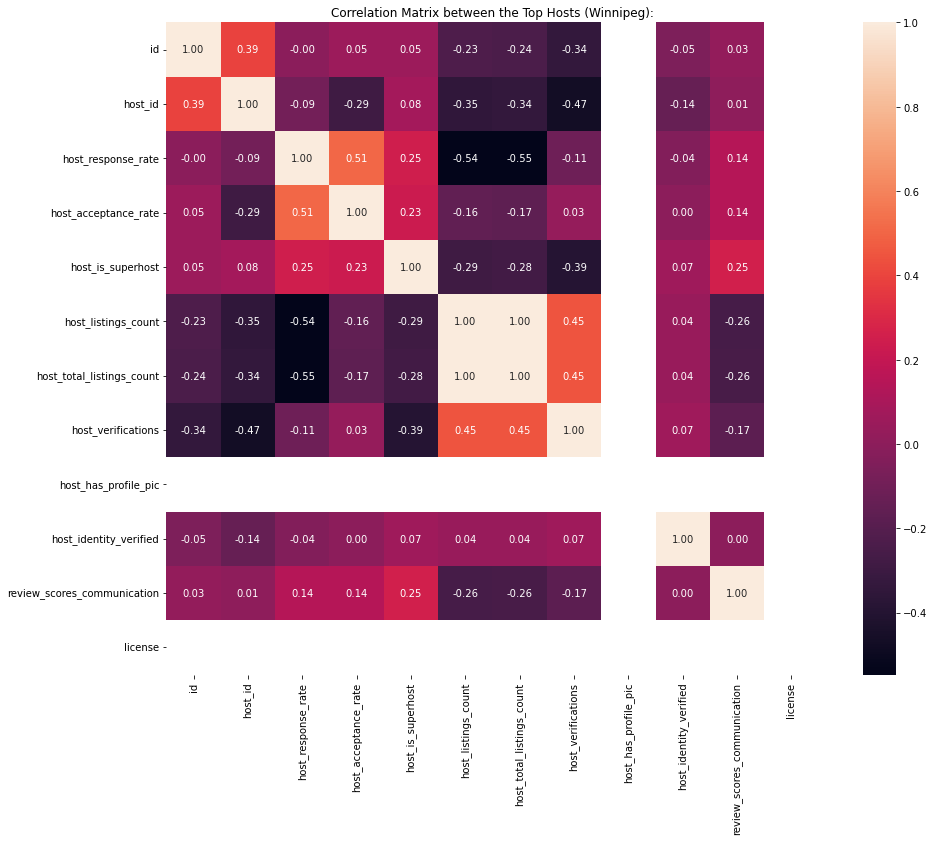

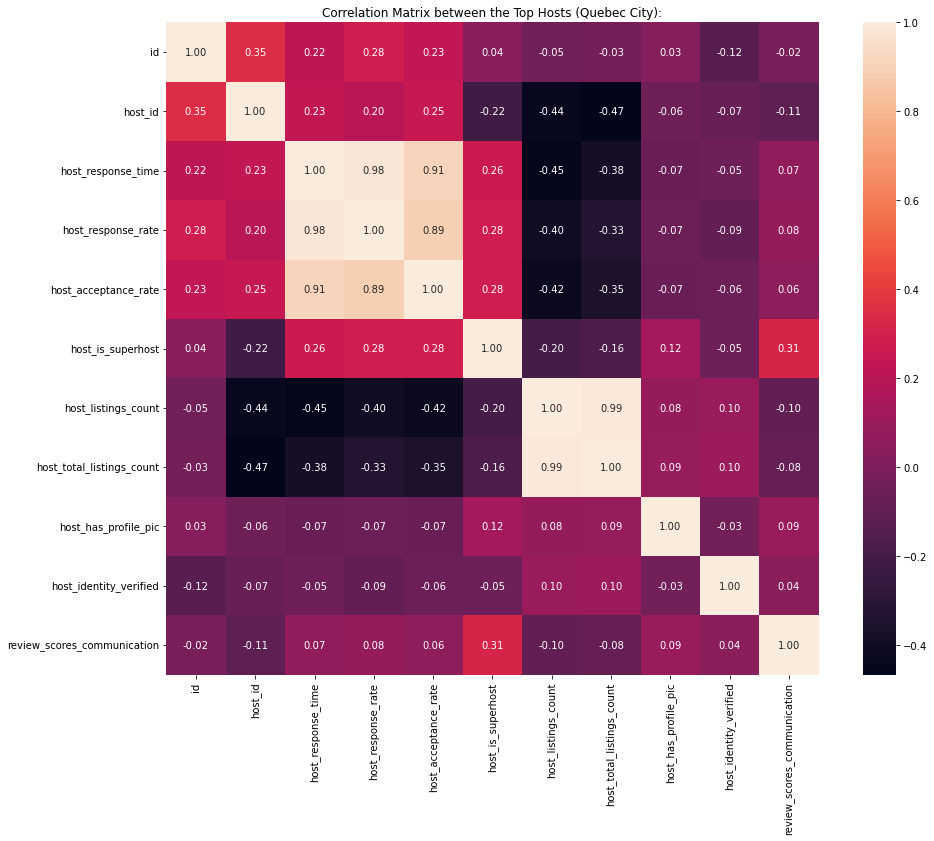

In [81]:
numeric_columns = filtered_data_winnipeg.select_dtypes(include=['int64', 'float64'])
# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix between the Top Hosts (Winnipeg):')
plt.show()

numeric_columns = filtered_data_quebec.select_dtypes(include=['int64', 'float64'])
# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix between the Top Hosts (Quebec City):')
plt.show()

# RQ2
Does the location affect the activity of the Airbnb?

15
Fort Rouge - East Fort Garry       323
Waverley West                      292
Daniel McIntyre                    203
St. Vital                          168
River Heights - Fort Garry         146
Point Douglas                      139
St. Boniface                       114
St. Norbert - Seine River          112
St. James                           93
Transcona                           82
Elmwood - East Kildonan             81
Charleswood - Tuxedo - Westwood     63
Mynarski                            37
North Kildonan                      24
Old Kildonan                        15
Name: neighbourhood_cleansed, dtype: int64


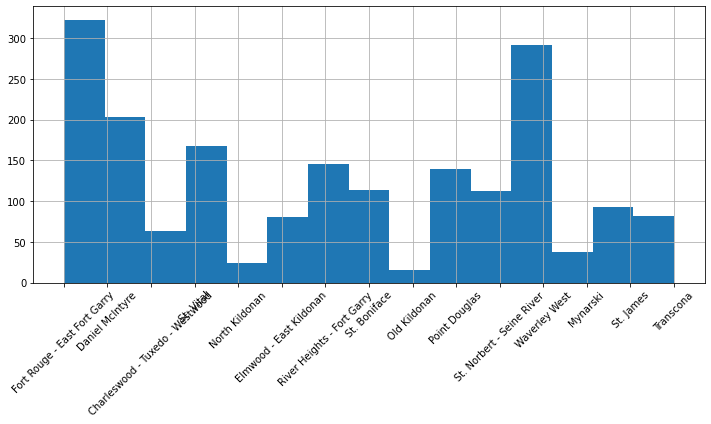

35
Saint-Roch                                      488
Vieux-Québec/Cap-Blanc/Colline parlementaire    436
Saint-Jean-Baptiste                             209
Saint-Sauveur                                   188
Vieux-Limoilou                                  138
Quartier 5-4                                     61
Cité Universitaire                               59
Montcalm                                         52
Sillery                                          51
Maizerets                                        49
Lairet                                           48
Neufchâtel-Est/Lebourgneuf                       33
Saint-Sacrement                                  32
Saint-Louis                                      30
Vieux-Moulin                                     29
Duberger-Les Saules                              27
Loretteville                                     26
Vanier                                           25
Pointe-de-Sainte-Foy                             22
Chutes-Mo

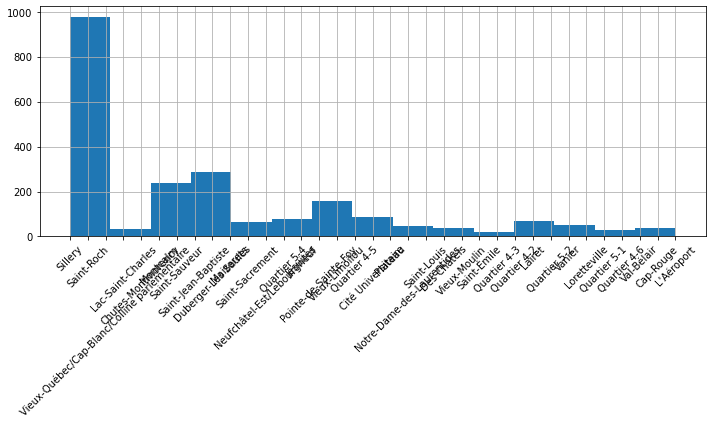

In [82]:
print(winnipegData['neighbourhood_cleansed'].nunique())
neighborhood_counts = winnipegData['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)
hist = winnipegData['neighbourhood_cleansed'].hist(bins=15)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 6)

# Use tight layout
plt.tight_layout()

plt.show()
print(quebecCityData['neighbourhood_cleansed'].nunique())
neighborhood_counts = quebecCityData['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)
hist = quebecCityData['neighbourhood_cleansed'].hist(bins=15)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 6)

# Use tight layout
plt.tight_layout()

plt.show()

neighbourhood_cleansed           host_id  
Charleswood - Tuxedo - Westwood  38459934     19
                                 110192366     7
                                 498610116     5
                                 105884901     3
                                 108713039     2
                                              ..
Waverley West                    526950332     1
                                 538927532     1
                                 542132713     1
                                 547263400     1
                                 549703601     1
Name: host_id, Length: 1124, dtype: int64


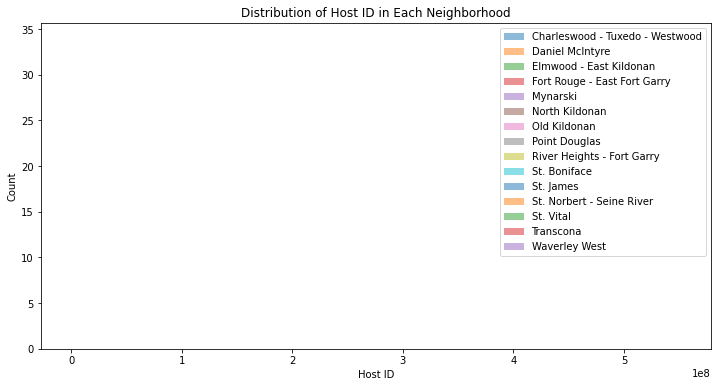

In [83]:
neighborhood_host_distribution = winnipegData.groupby('neighbourhood_cleansed')['host_id'].value_counts()

print(neighborhood_host_distribution)
neighborhood_host_distribution_df = neighborhood_host_distribution.reset_index(name='count')

# Plotting
plt.figure(figsize=(12, 6))
for neighborhood in neighborhood_host_distribution_df['neighbourhood_cleansed'].unique():
    data = neighborhood_host_distribution_df[neighborhood_host_distribution_df['neighbourhood_cleansed'] == neighborhood]
    plt.bar(data['host_id'], data['count'], alpha=0.5, label=neighborhood)

plt.xlabel('Host ID')
plt.ylabel('Count')
plt.title('Distribution of Host ID in Each Neighborhood')
plt.legend()
plt.show()

No handles with labels found to put in legend.


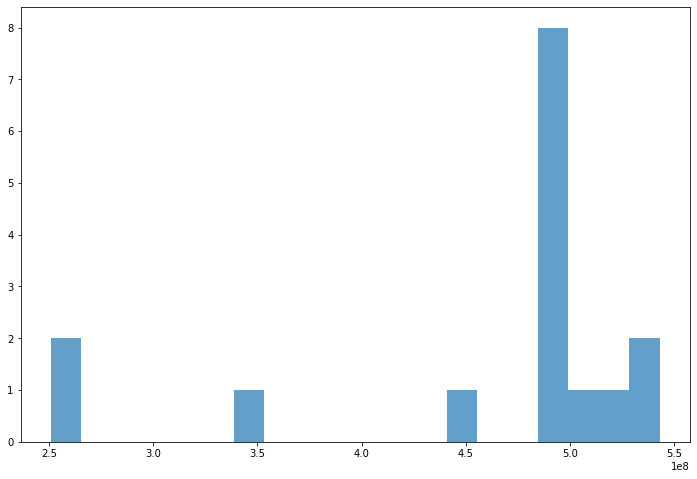

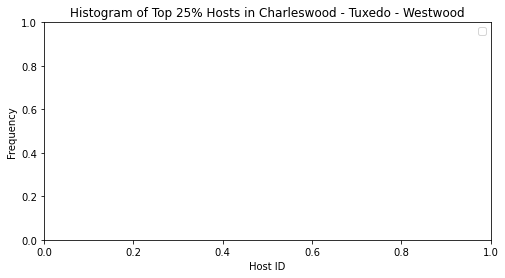

No handles with labels found to put in legend.


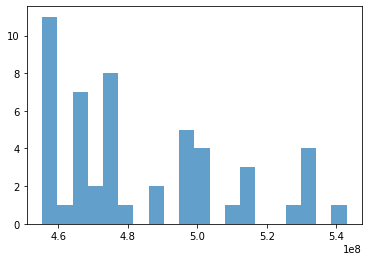

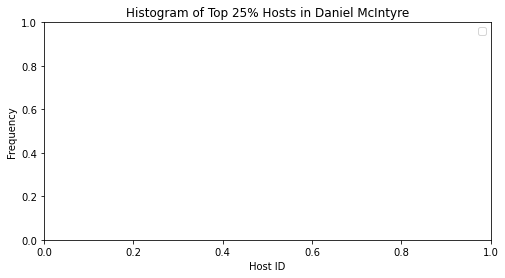

No handles with labels found to put in legend.


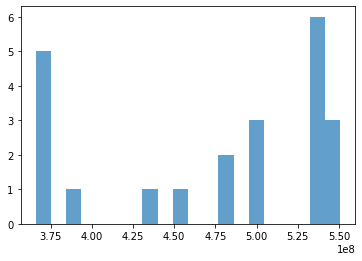

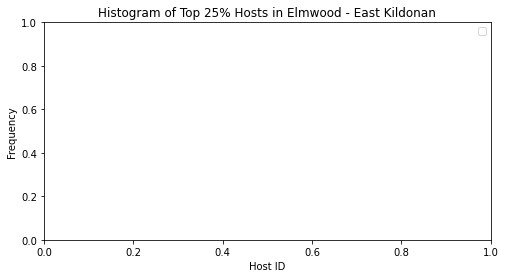

No handles with labels found to put in legend.


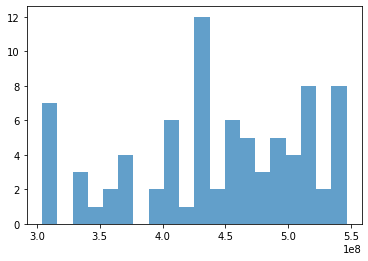

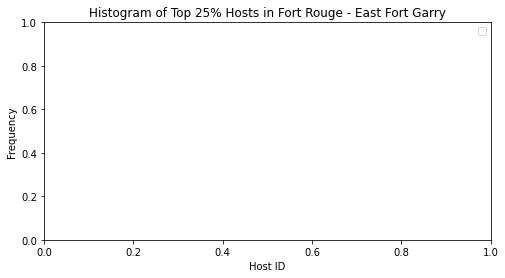

No handles with labels found to put in legend.


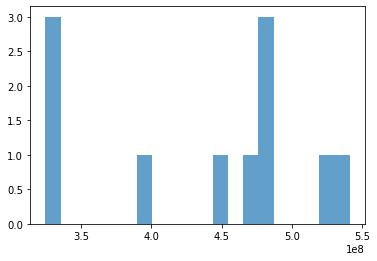

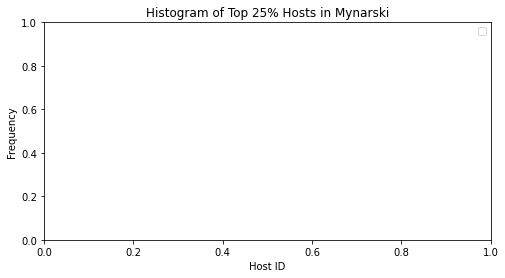

No handles with labels found to put in legend.


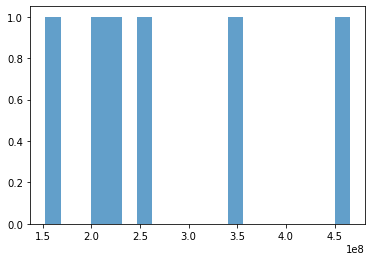

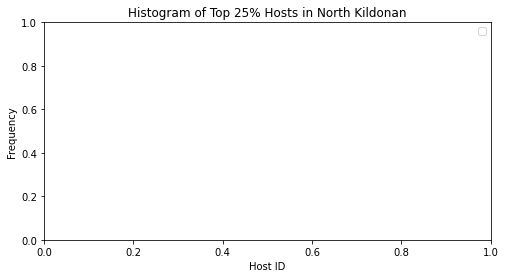

No handles with labels found to put in legend.


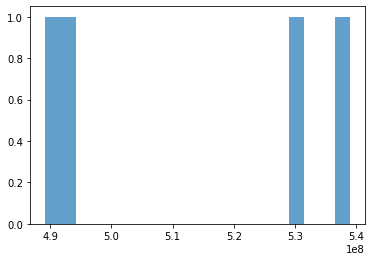

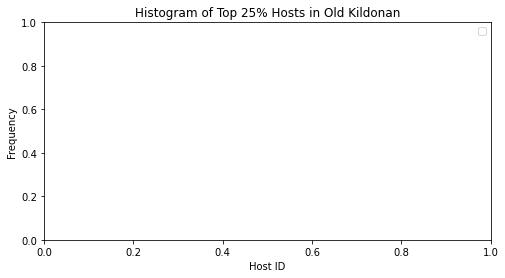

No handles with labels found to put in legend.


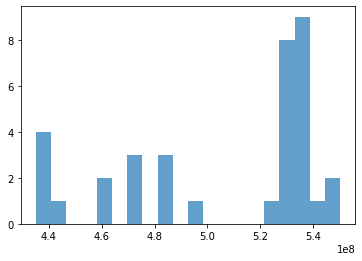

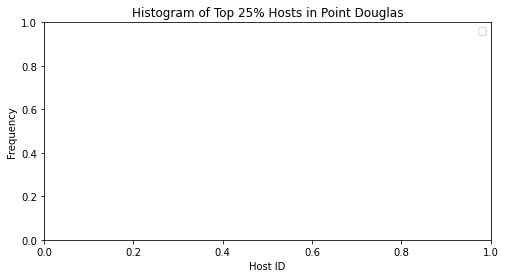

No handles with labels found to put in legend.


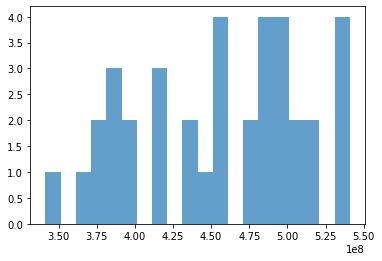

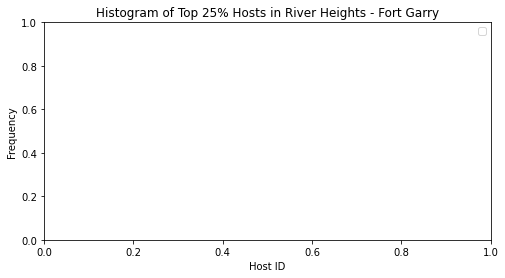

No handles with labels found to put in legend.


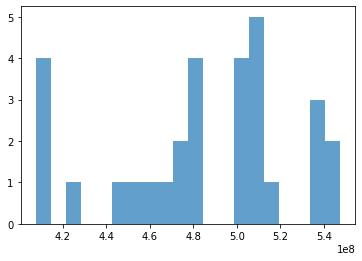

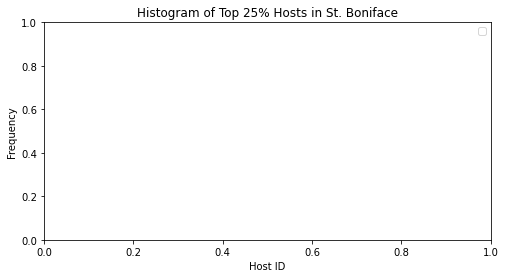

No handles with labels found to put in legend.


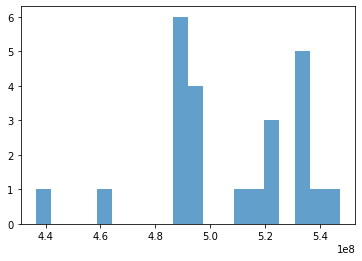

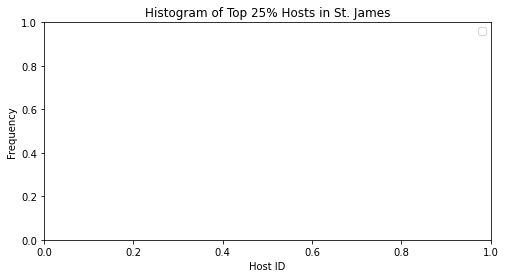

No handles with labels found to put in legend.


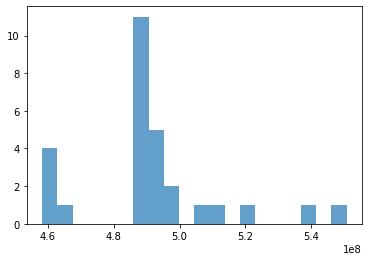

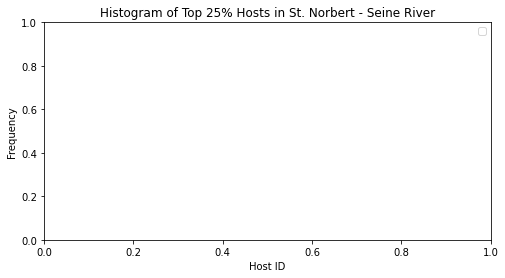

No handles with labels found to put in legend.


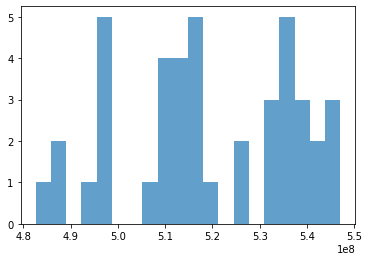

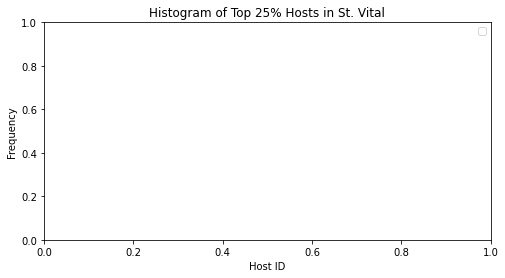

No handles with labels found to put in legend.


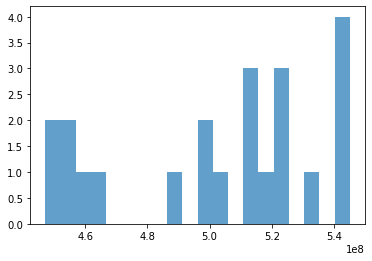

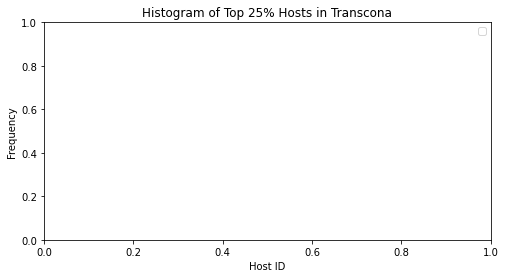

No handles with labels found to put in legend.


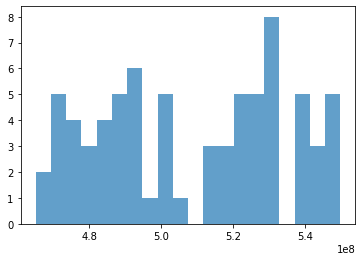

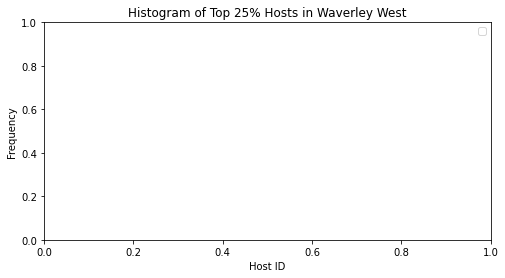

In [84]:
thresholds = winnipegData.groupby('neighbourhood_cleansed')['host_id'].quantile(0.75)

# Step 2: Filter the DataFrame to include only the top 25% of hosts in each neighborhood
top_hosts_df = winnipegData[winnipegData.groupby('neighbourhood_cleansed')['host_id'].transform(lambda x: x >= x.quantile(0.75))]

# Step 3: Plot histograms for each neighborhood
plt.figure(figsize=(12, 8))
for neighborhood, data in top_hosts_df.groupby('neighbourhood_cleansed'):
    plt.hist(data['host_id'], bins=20, alpha=0.7, label=neighborhood)
    plt.figure(figsize=(8, 4))
    plt.xlabel('Host ID')
    plt.ylabel('Frequency')
    plt.title(f'''Histogram of Top 25% Hosts in {neighborhood}''')
    plt.legend()
    plt.show()

In [85]:
neighborhood_repeat_hosts = winnipegData.groupby(['neighbourhood_cleansed', 'host_id']).size().reset_index(name='count')

# Find the neighborhood(s) with the highest count of repeat hosts
max_repeat_neighborhoods = neighborhood_repeat_hosts.groupby('neighbourhood_cleansed')['count'].sum().idxmax()
max_repeat_count = neighborhood_repeat_hosts.groupby('neighbourhood_cleansed')['count'].sum().max()

print("Neighborhood(s) with the most repeat host_ids:")
print(max_repeat_neighborhoods)
print("Number of repeat hosts:", max_repeat_count)
print("----------------------------------------")

neighborhood_repeat_hosts = winnipegData.groupby(['neighbourhood_cleansed', 'host_id']).size().reset_index(name='count')

# Calculate the total count of repeat hosts in each neighborhood
repeat_hosts_counts = neighborhood_repeat_hosts.groupby('neighbourhood_cleansed')['count'].sum()

print("Neighborhoods and their number of repeat hosts:")
for neighborhood, count in repeat_hosts_counts.items():
    print(neighborhood, ":", count)

Neighborhood(s) with the most repeat host_ids:
Fort Rouge - East Fort Garry
Number of repeat hosts: 323
----------------------------------------
Neighborhoods and their number of repeat hosts:
Charleswood - Tuxedo - Westwood : 63
Daniel McIntyre : 203
Elmwood - East Kildonan : 81
Fort Rouge - East Fort Garry : 323
Mynarski : 37
North Kildonan : 24
Old Kildonan : 15
Point Douglas : 139
River Heights - Fort Garry : 146
St. Boniface : 114
St. James : 93
St. Norbert - Seine River : 112
St. Vital : 168
Transcona : 82
Waverley West : 292
